In [1]:
%matplotlib inline
from scipy import sparse
import matplotlib.pyplot as plt
import numpy as np
import struct
import time

from utils import read_data

### Grab data

In [2]:
train_images = read_data.get_mnist_data(read_data.MNIST_TRAIN_IMAGES_URL).astype('int32')
train_labels = read_data.get_mnist_data(read_data.MNIST_TRAIN_LABELS_URL)
test_images = read_data.get_mnist_data(read_data.MNIST_TEST_IMAGES_URL).astype('int32')
test_labels = read_data.get_mnist_data(read_data.MNIST_TEST_LABELS_URL)

### Pull random sample from test and display label

2


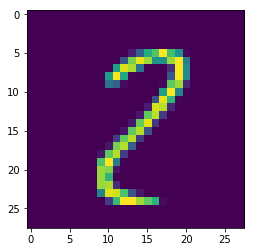

In [3]:
sample_test = np.random.randint(0,1000)
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Shuffle all rows

In [4]:
seed = np.random.randint(100)
# Get a random seed, but shuffle all matrices the same way
for i in range(test_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(test_images[i])
for i in range(train_images.shape[0]):
    np.random.seed(seed)
    np.random.shuffle(train_images[i])

2


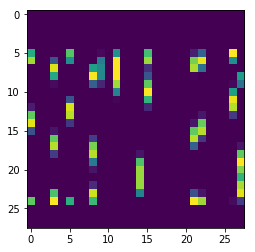

In [5]:
img = test_images[sample_test,:,:]
plt.imshow(img)
print(test_labels[sample_test])

### Sampling

In [6]:
test_samples = 1000 #Size of test data
test_labels = test_labels[:test_samples]
test_images = test_images[:test_samples,:]

### Flattens images into sparse vectors. So we go from 3D to 2D image datasets

In [7]:
def Flatten(Ims):
    return(sparse.csr_matrix(Ims.reshape(Ims.shape[0],-1)))

train_images = Flatten(train_images)
test_images = Flatten(test_images)

In [8]:
#Calculating squared vector norms
train_norms = np.array([train_images[i,:]*train_images[i,:].T.toarray() for i in range(train_images.shape[0])]).reshape(-1,1)

def PredictandError(testims, testlabels, trainims, trainlabels):
    #This is not technically a distance - we are leaving out the Test squared norms because they are constant
    #When determining a nearest neighbor.
    distances = train_norms*np.ones(testims.shape[0]).T - 2*trainims*testims.T 
    
    predictions = trainlabels[np.argmin(distances,axis=0)]
    
    error = 1 - np.mean(np.equal(predictions, testlabels))
    return(error*100)

In [9]:
t0 = time.time()
bucket_size = 1000
errors = []
for i in range(0,len(test_labels),bucket_size):
    errors.append(PredictandError(test_images[i:(i+bucket_size)], test_labels[i:(i+bucket_size)], train_images, train_labels))
t1 =time.time()

In [10]:
#Since the buckets are equal size, we can average the errors
print('error:' + str(np.mean(errors)))
print('Time taken:' + str(t1-t0))

error:3.8000000000000034
Time taken:9.368475675582886
